# COMP 4900 Assignment 1




# Initial Set-up
 * The followling block code is to setup our project 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
BANKRUPCY_DATA="/drive/My Drive/ML/bankrupcy.csv"
HEPATITIS_DATA="/drive/My Drive/ML/hepatitis.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.89 ms


# Start of the Project

In [ ]:
# Importing libaries that we need for the project 
import os 
import pandas as pd 
import numpy as np 
import sklearn.linear_model
!pip install ipython-autotime
%load_ext autotime



The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.44 s


# Dataset Set-Up, Formatting, and Feature Selection

In [ ]:
"""
A class that will get the data for both datasets
"""
import pandas as pd
import os
from math import floor
import numpy as np
import sklearn.linear_model
from sklearn import preprocessing

#values for Lasso regularization
ALPHA=0.001
class DataParser:
	def __init__(self):
		pass
		
	def import_bankrupcy(self,path = '/Data/bankrupcy.csv'):
		return self.import_data_by_name(path)


	def import_hepatitis(self,path = '/Data/hepatitis.csv'):
		return self.import_data_by_name(path)

	def import_bankrupcy_selected_feat(self,path = '/Data/bankrupcy.csv'):

		return self.import_selected_features(path)

	def import_hepatitis_selected_feat(self,path = '/Data/hepatitis.csv'):
		return self.import_selected_features(path)

	def import_data_by_name(self,dataPath):
		dataFrame = pd.read_csv(os.getcwd()+dataPath)
		dataFrame = dataFrame.sample(frac=1) # randomize dataset

		#Data setup feature1 + feature 2+......feature m + Label
		#keep all colmns except for the last one 
		featuresMatrix = dataFrame[dataFrame.columns[:-1]].to_numpy()

		#retrieve only the last column and turn it into a nunmpy object
		labels= dataFrame['ClassLabel'].to_numpy()
		featuresMatrix = self.normalization(featuresMatrix)
		return featuresMatrix , labels



	#peform normalization technique to out feature dataset
	def normalization(self,featuresMatrix):
		scaler = preprocessing.StandardScaler()
		#substract the mean of each colmn and divide by the standard deviation 
		scaled_values = scaler.fit_transform(featuresMatrix) 
		return scaled_values

	"""
	function that return selected features based on :
	L1 (Lasso) Regression: Choose features not weighted 0
	"""
	def import_selected_features(self,datapath):
		dataFrame = pd.read_csv(os.getcwd()+datapath)
		dataFrame = dataFrame.sample(frac=1) # randomize dataset
		dataFrameX = dataFrame.drop('ClassLabel', 1)
		
		dataFrameY = dataFrame['ClassLabel']
		dataColsNames = dataFrame.columns.to_list()
		linearModelOfData = sklearn.linear_model.Lasso(alpha=ALPHA)
		linearModelOfData.fit(dataFrameX, dataFrameY)
		#Print all items features not weighted 0

		#print("Selected Features: \n")
		nameOfSelectedFeatures = [] #List for the selected features
		i = 0
		while i < len(linearModelOfData.coef_):
			if(linearModelOfData.coef_[i] != 0):
				#print(str(dataColsNames[i]) + ": " + str(linearModelOfData.coef_[i]))
				nameOfSelectedFeatures.append(dataColsNames[i])#added colmns names where the feature is weighted not zerp
			i = i+1
		nameOfSelectedFeatures.append('ClassLabel')# add the Class label

		#selected features where they are 
		dfSelectFeatures= dataFrame[nameOfSelectedFeatures]

		#Data setup feature1 + feature 2+......feature m + Label
		#keep all colmns except for the last one 
		featuresMatrix = dfSelectFeatures[dfSelectFeatures.columns[:-1]].to_numpy()

		#retrieve only the last column and turn it into a nunmpy object
		labels= dataFrame['ClassLabel'].to_numpy()
		
		featuresMatrix = self.normalization(featuresMatrix)

		return featuresMatrix , labels


time: 77 ms


# Investigating  Bankruptcy Data



In [ ]:
import os
#printing out information about our colmns
bankruptcy_df = pd.read_csv(os.getcwd() +BANKRUPCY_DATA)



time: 23.7 ms


In [ ]:

#printing out the name of colmns and couple of rows
bankruptcy_df.head()


,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20,attribute21,attribute22,attribute23,attribute24,attribute25,attribute26,attribute27,attribute28,attribute29,attribute30,attribute31,attribute32,attribute33,attribute34,attribute35,attribute36,attribute37,attribute38,attribute39,attribute40,attribute41,attribute42,attribute43,attribute44,attribute45,attribute46,attribute47,attribute48,attribute49,attribute50,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,attribute60,attribute61,attribute62,attribute63,attribute64,ClassLabel
0,-0.0315,-0.0913,-0.0403,-0.0135,0.00741,-0.0160,-0.000264,0.6410,-0.748,0.1270,-0.214,-0.0366,-0.01090,-0.000269,-0.00530,-0.243,0.5800,-0.00240,0.02930,-0.07030,-0.0164,-0.4030,0.03310,-0.00452,0.0502,-0.207,-0.00999,-0.0194,-0.6310,-0.0155,0.06620,-0.01400,-0.3690,-0.144,-0.436,-0.974000,-0.0341,0.07980,-0.0162,0.1810,-0.00721,-0.0139,-0.0193,-0.00908,0.01720,0.1470,-0.0419,-0.1480,0.00486,-0.192,-1.0300,-0.01330,-0.01640,-0.0181,-0.1110,0.01440,0.00546,-0.01410,-0.02090,0.0684,-0.2140,-0.01390,-0.1740,-0.0468,0
1,-0.2320,-0.0494,0.3040,-0.0810,0.00751,-0.0160,-0.035000,0.0747,0.470,0.0738,-0.836,-0.3000,-0.01310,-0.035000,-0.12000,-0.603,0.0407,-0.03660,-0.02590,-0.04790,-0.0170,-0.8730,-0.02220,0.04890,0.2740,-0.591,-0.01090,-0.0158,-1.1700,-0.0222,-0.03150,-0.02320,0.0220,1.230,-0.986,0.190000,-0.0245,0.01110,-0.0526,-0.0881,-0.00788,-0.0396,-0.0164,-0.00966,0.00237,-0.0135,-0.0350,-0.7900,-0.02520,0.187,-0.0791,-0.02250,-0.00301,-0.0145,-0.1150,0.00849,-0.00839,-0.00867,-0.02310,-0.0335,-0.2060,-0.01520,-0.0731,-0.0272,0
2,-0.0586,0.0651,-0.4880,-0.1890,0.00657,-0.0160,-0.004950,-0.4560,0.270,-0.0713,0.157,-0.1510,-0.01170,-0.004960,0.00948,-0.367,-0.4650,-0.00702,0.00439,0.00176,-0.0175,0.1520,0.00817,0.03060,-0.1140,-0.339,-0.00993,-0.0209,0.0962,-0.0152,0.00913,-0.01600,-0.3200,0.060,0.766,-0.000812,-0.0345,-0.02380,0.0685,-0.1480,-0.00740,0.0203,-0.0154,-0.01650,0.00391,-0.2350,-0.0129,0.0846,0.03030,-0.469,0.3940,-0.01530,-0.03020,-0.0196,-0.1230,0.01080,0.00678,-0.00944,-0.00792,-0.0435,0.0197,-0.01170,-0.2920,-0.0336,0
3,-0.0694,0.0446,-0.1820,-0.1400,0.00748,-0.0109,-0.005600,-0.4630,-0.287,-0.0853,-0.315,-0.1460,-0.01100,-0.005600,0.04590,-0.454,-0.4140,-0.00765,0.01570,-0.00643,-0.0161,-0.0895,0.01460,-0.03820,-0.1060,-0.443,-0.00992,-0.0196,0.2960,0.0147,0.01130,0.00659,-0.5770,-0.643,-0.100,-1.070000,-0.0345,-0.00411,0.0710,-0.1390,-0.00734,0.0558,0.0187,0.02080,0.00406,-0.0679,-0.0166,0.0795,0.05850,-0.515,-0.2680,0.00728,-0.03390,-0.0200,-0.0771,0.01070,0.00538,-0.01080,0.00138,-0.0428,-0.3510,0.00297,-0.5550,-0.0468,0
4,0.2360,-0.0519,0.6780,-0.0147,0.00788,-0.0160,0.057400,0.0972,0.423,0.0769,0.919,0.2090,-0.00891,0.057400,-0.02100,0.744,0.0621,0.05440,0.06730,-0.04310,-0.0160,0.8670,0.05980,0.10800,-0.1280,0.675,-0.00906,-0.0121,-0.5010,-0.0246,0.06960,-0.02190,-0.0692,0.892,1.000,0.145000,-0.0304,0.01970,0.0763,0.0179,-0.00744,0.0573,-0.0170,-0.01100,0.00655,0.0499,-0.0312,0.6150,0.06310,0.343,-0.2100,-0.02130,0.00523,-0.0107,-0.0766,0.01100,0.02530,-0.01110,-0.02250,-0.0359,-0.1820,-0.01560,-0.0278,-0.0237,0


time: 118 ms


In [ ]:

#printing out the 
bankruptcy_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   attribute1   453 non-null    float64
 1   attribute2   453 non-null    float64
 2   attribute3   453 non-null    float64
 3   attribute4   453 non-null    float64
 4   attribute5   453 non-null    float64
 5   attribute6   453 non-null    float64
 6   attribute7   453 non-null    float64
 7   attribute8   453 non-null    float64
 8   attribute9   453 non-null    float64
 9   attribute10  453 non-null    float64
 10  attribute11  453 non-null    float64
 11  attribute12  453 non-null    float64
 12  attribute13  453 non-null    float64
 13  attribute14  453 non-null    float64
 14  attribute15  453 non-null    float64
 15  attribute16  453 non-null    float64
 16  attribute17  453 non-null    float64
 17  attribute18  453 non-null    float64
 18  attribute19  453 non-null    float64
 19  attribut

In [ ]:
#printing out the selected features used bankruptcy
dataFrameX = bankruptcy_df.drop('ClassLabel', 1)
dataFrameY = bankruptcy_df['ClassLabel']
dataColsNames = dataFrameX.columns.to_list()
linearModelOfData = sklearn.linear_model.Lasso(alpha=ALPHA)
linearModelOfData.fit(dataFrameX, dataFrameY)
print("Selected Features: \n")
nameOfSelectedFeatures = [] #List for the selected features
i = 0
while i < len(linearModelOfData.coef_):
    if(linearModelOfData.coef_[i] != 0):
        nameOfSelectedFeatures.append(dataColsNames[i])#added colmns names where the feature is weighted not zerp
    i = i+1
#selected features where they are 
dfSelectFeatures= bankruptcy_df[nameOfSelectedFeatures]
dfSelectFeatures.info()



Selected Features: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   attribute1   453 non-null    float64
 1   attribute2   453 non-null    float64
 2   attribute4   453 non-null    float64
 3   attribute8   453 non-null    float64
 4   attribute9   453 non-null    float64
 5   attribute12  453 non-null    float64
 6   attribute15  453 non-null    float64
 7   attribute20  453 non-null    float64
 8   attribute21  453 non-null    float64
 9   attribute22  453 non-null    float64
 10  attribute24  453 non-null    float64
 11  attribute25  453 non-null    float64
 12  attribute26  453 non-null    float64
 13  attribute29  453 non-null    float64
 14  attribute31  453 non-null    float64
 15  attribute34  453 non-null    float64
 16  attribute35  453 non-null    float64
 17  attribute36  453 non-null    float64
 18  attribute37  453 non-null    

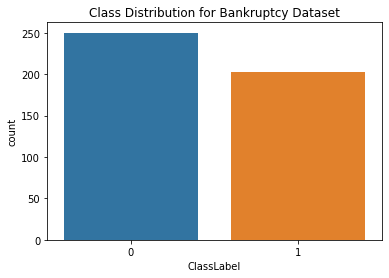

time: 174 ms


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Printing out the distrbutions of class labels
ax = plt.axes()
sns.countplot(x="ClassLabel", data=bankruptcy_df, ax=ax)
ax.set_title('Class Distribution for Bankruptcy Dataset')

# Printing out the distributions of specific features
sns.countplot(x="ClassLabel", data=bankruptcy_df, ax=ax)



In [ ]:
#decribe data
bankruptcy_df.describe()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20,attribute21,attribute22,attribute23,attribute24,attribute25,attribute26,attribute27,attribute28,attribute29,attribute30,attribute31,attribute32,attribute33,attribute34,attribute35,attribute36,attribute37,attribute38,attribute39,attribute40,attribute41,attribute42,attribute43,attribute44,attribute45,attribute46,attribute47,attribute48,attribute49,attribute50,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,attribute60,attribute61,attribute62,attribute63,attribute64,ClassLabel
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.00000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,-0.079329,0.034849,-0.228204,-0.070187,0.007117,-0.070507,-0.006387,-0.137298,0.079628,-0.038179,-0.184612,-0.086773,-0.013439,-0.006392,-0.005153,-0.23991,-0.146144,-0.008432,-0.035658,0.096797,0.050098,-0.205164,-0.030013,-0.084634,-0.137836,-0.236385,-0.009777,-0.011449,-0.145535,0.044153,-0.034203,-0.009486,-0.103328,0.110358,-0.247298,-0.016978,-0.012521,-0.025538,-0.039993,-0.035146,-0.007386,-0.031183,0.012971,-0.001902,0.003613,-0.075185,-0.017667,-0.114832,-0.018169,-0.154670,0.223719,-0.010221,-0.011205,-0.011589,-0.101627,0.009393,-0.019739,-0.009330,0.022235,-0.028293,-0.005740,0.021030,-0.120022,-0.004343,0.448124
std,0.252813,0.101913,1.032602,0.302937,0.012653,1.053857,0.046343,0.839836,0.955072,0.126544,0.746761,0.380864,0.021660,0.046342,0.241928,0.78927,0.815853,0.045649,0.504346,2.210859,1.349882,0.769030,0.426189,1.633206,0.403346,0.802891,0.001834,0.068906,0.985824,1.175464,0.530826,0.063428,0.532428,0.942146,0.977401,0.959335,0.242490,0.076521,0.506831,0.251033,0.000732,0.396027,0.531838,0.205564,0.021090,0.285901,0.059416,0.677625,0.376776,0.759908,1.025234,0.062096,0.142468,0.069628,0.516665,0.009096,0.306401,0.009146,0.588701,0.069107,0.480261,0.630186,0.534885,0.205593,0.497851
min,-2.250000,-0.159000,-5.990000,-0.381000,-0.143000,-22.400000,-0.384000,-0.874000,-1.260000,-0.883000,-4.060000,-1.900000,-0.460000,-0.384000,-2.370000,-3.11000,-0.862000,-0.381000,-10.400000,-0.073400,-0.019100,-4.200000,-8.680000,-34.700000,-2.520000,-3.270000,-0.016900,-0.090400,-3.240000,-0.033900,-11.000000,-0.030700,-0.759000,-1.070000,-9.210000,-1.470000,-0.034700,-0.493000,-10.400000,-0.153000,-0.015400,-8.110000,-0.031300,-0.022300,-0.400000,-0.323000,-0.043800,-3.590000,-7.620000,-0.975000,-1.420000,-0.030100,-1.370000,-0.108000,-3.470000,-0.176000,-5.460000,-0.018200,-0.742000,-0.048600,-0.413000,-0.021100,-0.743000,-0.051000,0.000000
25%,-0.140000,-0.030600,-0.799000,-0.223000,0.006530,-0.020400,-0.020200,-0.503000,-0.396000,-0.101000,-0.443000,-0.213000,-0.012900,-0.020200,-0.029200,-0.54300,-0.505000,-0.022100,-0.013600,-0.050100,-0.016500,-0.446000,-0.009000,-0.056600,-0.308000,-0.521000,-0.010000,-0.022400,-0.748000,-0.021900,-0.014900,-0.023100,-0.431000,-0.523000,-0.583000,-0.611000,-0.034400,-0.069300,-0.030900,-0.142000,-0.007440,-0.018000,-0.020700,-0.016400,0.003440,-0.225000,-0.034900,-0.371000,-0.006850,-0.559000,-0.493000,-0.022700,-0.033900,-0.022100,-0.138000,0.009200,-0.003230,-0.010600,-0.022500,-0.044000,-0.210000,-0.015800,-0.4

time: 257 ms


# Investigating  Hepatitis Data



In [ ]:
import os
import pandas as pd
#printing out information about our colmns
hepatitis_df = pd.read_csv(os.getcwd() + HEPATITIS_DATA)



time: 9.98 ms


In [ ]:

#printing out the name of colmns and couple of rows
hepatitis_df.head()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,ClassLabel
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,1


time: 31.6 ms


In [ ]:

#printing out the info
hepatitis_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             142 non-null    int64  
 1   sex             142 non-null    int64  
 2   steroid         142 non-null    int64  
 3   antivirals      142 non-null    int64  
 4   fatigue         142 non-null    int64  
 5   malaise         142 non-null    int64  
 6   anorexia        142 non-null    int64  
 7   liver_big       142 non-null    int64  
 8   liver_firm      142 non-null    int64  
 9   spleen_palable  142 non-null    int64  
 10  spiders         142 non-null    int64  
 11  ascites         142 non-null    int64  
 12  varices         142 non-null    int64  
 13  bilirubin       142 non-null    float64
 14  alk_phosphate   142 non-null    int64  
 15  sgot            142 non-null    int64  
 16  albumin         142 non-null    float64
 17  protime         142 non-null    int

In [ ]:
#printing out the selected features used heptasis
dataFrameX = hepatitis_df.drop('ClassLabel', 1)
dataFrameY = hepatitis_df['ClassLabel']
dataColsNames = dataFrameX.columns.to_list()
linearModelOfData = sklearn.linear_model.Lasso(alpha=ALPHA)
linearModelOfData.fit(dataFrameX, dataFrameY)
print("Selected Features: \n")
nameOfSelectedFeatures = [] #List for the selected features
i = 0
while i < len(linearModelOfData.coef_):
    if(linearModelOfData.coef_[i] != 0):
        nameOfSelectedFeatures.append(dataColsNames[i])#added colmns names where the feature is weighted not zerp
    i = i+1
#selected features where they are 
dfSelectFeatures= hepatitis_df[nameOfSelectedFeatures]
dfSelectFeatures.info()


Selected Features: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             142 non-null    int64  
 1   sex             142 non-null    int64  
 2   steroid         142 non-null    int64  
 3   antivirals      142 non-null    int64  
 4   malaise         142 non-null    int64  
 5   anorexia        142 non-null    int64  
 6   liver_big       142 non-null    int64  
 7   liver_firm      142 non-null    int64  
 8   spleen_palable  142 non-null    int64  
 9   spiders         142 non-null    int64  
 10  ascites         142 non-null    int64  
 11  varices         142 non-null    int64  
 12  bilirubin       142 non-null    float64
 13  alk_phosphate   142 non-null    int64  
 14  sgot            142 non-null    int64  
 15  albumin         142 non-null    float64
 16  protime         142 non-null    int64  
 17  histology     

Text(0.5, 1.0, 'Class Distribution for Hepatitis Dataset')

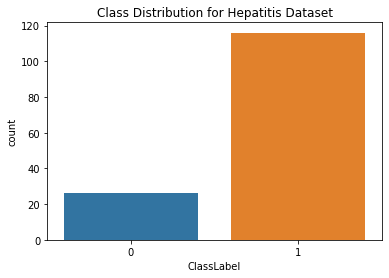

time: 144 ms


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Printing out the distrbutions of class labels
ax = plt.axes()
sns.countplot(x="ClassLabel", data=hepatitis_df, ax=ax)
ax.set_title('Class Distribution for Hepatitis Dataset')

In [ ]:
#decribe data
hepatitis_df.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,ClassLabel
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662,0.816901
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575,0.388116
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000,0.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000,1.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000,1.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000,1.000000


time: 86.9 ms


# Implementing Machine Learning Models

In [ ]:
"""
A class that represents a Logistic Regression Model
using cross entropy function 
Input: 
    learning_rate: The amount that the weights are updated during training
    training_iterations: number of times we should train our model 

"""

import pandas as pd 
import numpy as np 
class LR():
  def __init__(self,learning_rate,training_iteration,epilson=0.02):
    #each model will be defined by the learning rate and number of training_iteration
    self.k = training_iteration
    self.learnin_rate = learning_rate
    self.weights =[] #intiaize weights to be empty
    self.epilson= epilson

  def sigmoid(self,x):
    # 1/ 1 + e ^-x     
    # where x =wTx 
    return 1 / (1 + np.exp(-x,dtype=np.float128))

  def computeSigmoidInput(self,xi):
    # wTx 
    return np.dot(self.weights.T,xi)

    
  def fit(self,X,Y):
    #This model will learned based on the cross entropy function 
    intercept = np.ones((X.shape[0],1))
    X = np.concatenate((intercept,X),axis=1)
    
    self.weights= np.zeros(X.shape[1],dtype=np.float128) 

    for iter in range(self.k):
      gradient=0
      for i in range(X.shape[0]):

        xi=np.array(X[i],dtype=np.float128 )# xi represents an the ith exaample in our traning example 
        yi=np.array(Y[i],dtype=np.float128) # yi represents an the ith exaample in our label example 

        sigmoidInput= self.computeSigmoidInput(xi)# z= (wT * xi)
        predicted_output= self.sigmoid(sigmoidInput) # sigmoid(z)
        
        error = yi-predicted_output #computing the error error=y- sigmoid(z)
        
        gradient = gradient + (xi*error) # addin
        

      oldWeight = self.weights
      # updating the weights for the model
      self.weights = self.weights + (self.learnin_rate * (gradient))
      norms = np.linalg.norm(self.weights - oldWeight)**2
      # end when there almost no difference in the new weights and old one
      if(norms<self.epilson):
          return

   
  def predict(self,data):
    #model is making a new prediction
    #calculating the a probabilties vector for a given new feature vector data
    intercept = np.ones((data.shape[0],1))
    data = np.concatenate((intercept,data),axis=1)
    prVector=[self.sigmoid(self.computeSigmoidInput(row)) for row in data] #sigmoid(wT * x_new )  

    # functions to determine based off the probabilty what class does the feature fall in
    classify= lambda x: 1 if x >= 0.5 else 0 #our decison boundary will be places at 0.5
    predictions=[classify(xi) for xi in prVector]
    return predictions

time: 56.8 ms


# K-Fold CrossValidation 

In [ ]:
"""
A class that implement the k fold  cross validation algorithem
 
Input: 
      k= the number of folds to do 
"""
import numpy as np
import math
import copy

class k_Fold_Validation():
    def __init__(self, k=10):
        self.k = k
    def get_k_Partitions_And_Labels(self, X, Y, k):
        #from 1....k
        #add the ith row(example) to an list and step by k to get the next row
        #once it is done convert the list to an np array object
        #this solution will have each array have around the same size of examples instead of the last array having less then the other subset
        kPartitionFeatures = np.array([X[i::k] for i in range(k)])
        kPartitionLabels = np.array([Y[i::k] for i in range(k)])

        return kPartitionFeatures, kPartitionLabels

    def get_ith_traningSet_ValidSet(self, ithExperiment, kPartitionFeatures, kPartitionLabels, numRow, k):

        #the validation set is going to be on the number of experiment we have run
        validSet = copy.deepcopy(kPartitionFeatures[ithExperiment])
        validSetLabel = copy.deepcopy(kPartitionLabels[ithExperiment])

        #copy traning data
        numTrainingRow = numRow - validSet.shape[0]
        numDataColmns = validSet.shape[1]
        trainingSet = copy.deepcopy(kPartitionFeatures)
        trainingSetLabel = copy.deepcopy(kPartitionLabels)

        #remove the itth index subset because it was used for validation
        trainingSet = np.delete(kPartitionFeatures, ithExperiment, axis=0)
        trainingSetLabel = np.delete(kPartitionLabels, ithExperiment, axis=0)

        #concatenates all the elemenes into a single numpy arrray and then reshape the data to be the size required
        trainingSet = np.concatenate(trainingSet).ravel().reshape(
            numTrainingRow, numDataColmns)
        trainingSetLabel = np.concatenate(
            trainingSetLabel).ravel().reshape(numTrainingRow, 1)

        return trainingSet, trainingSetLabel, validSet, validSetLabel

    def getTestError(self, predictedLabels, trueLabels):

        #count the number of predicted labels the same as the true labels and divide it by the total numbers of labels
        errorRate =(predictedLabels != trueLabels).mean()
        print("the test error was " + str(errorRate))
        return errorRate


    def accul_eval(self, predictValues , trueLabel):
      return (predictValues == trueLabel ).mean()

    #used on one model 
    def run_k_fold_cross_valid(self,X, Y,model):
        k = self.k

        #splits the data in k parts
        kPartitionFeatures, kPartitionLabels = self.get_k_Partitions_And_Labels(
            X, Y, k)

        accuracies = np.zeros((k,))

        #run k experiments
        for ithExperiment in range(k):
            trainingSet, trainingSetLabel, validSet, validSetLabel = self.get_ith_traningSet_ValidSet(ithExperiment, kPartitionFeatures, kPartitionLabels, X.shape[0], k)

            #model trains on the traning data

            model.fit(trainingSet, trainingSetLabel)

            #model tests on validation set
            predictedLabels = model.predict(validSet)

            accuracies[ithExperiment] = self.accul_eval(predictedLabels, validSetLabel)

        #get the average error rate of this model
        avgAcc = accuracies.mean()
        print("The average accuracy", avgAcc)

        return avgAcc
        

time: 67.8 ms


Used to graph the results of our experiments

In [ ]:
def graphAccuracy(learningRates,modelResults,modelResults2,dataSetName):

    #make graph for plot one 
    plt.figure(1)
    plt.title("Accuracy on "+dataSetName)
    plt.xlabel('Learning Rate')
    plt.ylabel('Average Accuracy')
    plt.plot(learningRates, modelResults, label ="Original Features",color='blue',marker='o')
    plt.plot(learningRates, modelResults2,label="Selected Features", color='red',linestyle='--',marker='o')
    plt.legend()
    plt.savefig('Accuracy_'+dataSetName+'.png',bbox_inches='tight')
    plt.show()


def graphRunTime(learningRates,runTimes,runTimes2,dataSetName):
    #make graph for plot 2
    plt.figure(2)
    plt.title("Runtime on "+dataSetName)
    plt.xlabel('Learning Rate')
    plt.ylabel('Time of Accuracy')
    plt.plot(learningRates, runTimes, label ="Original Features",color='blue',marker='o')
    plt.plot(learningRates, runTimes2,label="Selected Features", color='red',linestyle='--',marker='o')
    plt.legend()
    plt.savefig('RunTime_'+dataSetName+'.png',bbox_inches='tight')
    plt.show()



time: 16.2 ms


# Results




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
def runTest(data_kFold_x, data_kFold_y):
    parser = DataParser()
    kFold= k_Fold_Validation()

    learningRates = np.arange(0.00, 0.12, 0.02)
    numIterations = 1000
    model_accuracies = []
    runTime =[]

    #create T models for cross Valiadation
    for rate in learningRates:
        model = LR(rate, numIterations)
        start = time.time()
        avgAccuracy = kFold.run_k_fold_cross_valid(data_kFold_x,data_kFold_y, model)
        #time it took to run cross validation
        end = time.time()
        runTime.append(end-start)
        model_accuracies.append(avgAccuracy)

    return learningRates ,model_accuracies, runTime



time: 8.2 ms


The average accuracy 0.8171428571428571
The average accuracy 0.8519047619047619
The average accuracy 0.8376190476190477
The average accuracy 0.8095238095238095
The average accuracy 0.8238095238095238
The average accuracy 0.8314285714285715
The average accuracy 0.8171428571428571
The average accuracy 0.8585714285714285
The average accuracy 0.8442857142857143
The average accuracy 0.8661904761904762
The average accuracy 0.8595238095238095
The average accuracy 0.8314285714285713


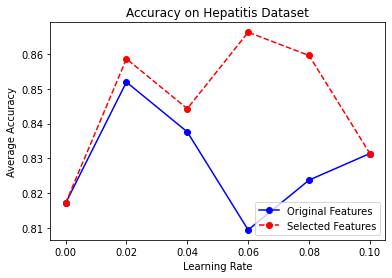

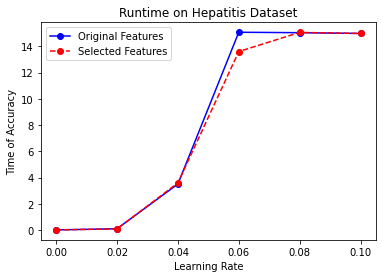

time: 1min 36s


In [ ]:
#running Hepatsis Test
def runHeptatsis():
    parser = DataParser()
    dataSetName = "Hepatitis Dataset"

    plt.title(dataSetName)
    plt.xlabel('Learning Rate')
    plt.ylabel('Average Accuracy ')

    #run test on original data
    data_kFold_x ,data_kFold_y, = parser.import_hepatitis(HEPATITIS_DATA)
    learningRates, modelResults, runTimes = runTest(data_kFold_x ,data_kFold_y)

    
    #run data on subselection of data
    data_kFold_x ,data_kFold_y = parser.import_hepatitis_selected_feat(HEPATITIS_DATA)
    learningRates, modelResults2,runTimes2  = runTest(data_kFold_x ,data_kFold_y)

    #graph results
    graphAccuracy(learningRates,modelResults,modelResults2,dataSetName)

    graphRunTime(learningRates,runTimes,runTimes2,dataSetName)



if __name__ == "__main__":
    runHeptatsis()


The average accuracy 0.4482125603864734
The average accuracy 0.7439613526570048
The average accuracy 0.71975845410628
The average accuracy 0.7398550724637681
The average accuracy 0.6864734299516908
The average accuracy 0.7352657004830918
The average accuracy 0.4479710144927537
The average accuracy 0.7300000000000001
The average accuracy 0.6975845410628019
The average accuracy 0.7107729468599033
The average accuracy 0.7016908212560385
The average accuracy 0.7108695652173914


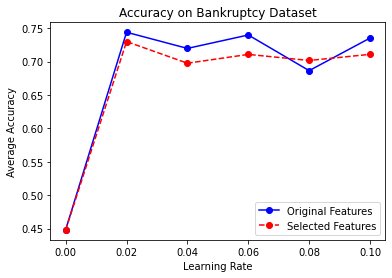

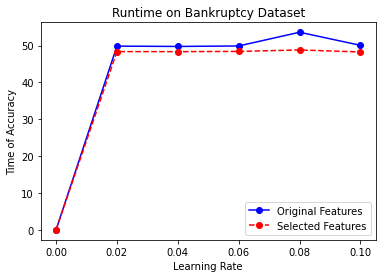

time: 8min 16s


In [ ]:
def runBankRuptcyTest():
    parser = DataParser()
    dataSetName = "Bankruptcy Dataset"
    
    #run test on original data
    data_kFold_x ,data_kFold_y, = parser.import_bankrupcy (BANKRUPCY_DATA)
    learningRates, modelResults, runTimes = runTest(data_kFold_x ,data_kFold_y)
    
    #run data on subselection of data
    data_kFold_x ,data_kFold_y = parser.import_bankrupcy_selected_feat(BANKRUPCY_DATA)
    learningRates, modelResults2,runTimes2  = runTest(data_kFold_x ,data_kFold_y)

    #graph results
    graphAccuracy(learningRates,modelResults,modelResults2,dataSetName)
    
    graphRunTime(learningRates,runTimes,runTimes2,dataSetName)


    

if __name__ == "__main__":
    runBankRuptcyTest()
